<a href="https://colab.research.google.com/github/julrods/aggressive-tweet-analyzer/blob/main/2_BERT_Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Environment</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#BERT-model-setup" data-toc-modified-id="BERT-model-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BERT model setup</a></span></li><li><span><a href="#Fine-tuning-the-pre-trained-BERT-model" data-toc-modified-id="Fine-tuning-the-pre-trained-BERT-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fine-tuning the pre-trained BERT model</a></span><ul class="toc-item"><li><span><a href="#Aggression-dataset---4-epochs" data-toc-modified-id="Aggression-dataset---4-epochs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Aggression dataset - 4 epochs</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-from-the-pickle-files" data-toc-modified-id="Loading-the-data-from-the-pickle-files-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Loading the data from the pickle files</a></span></li><li><span><a href="#Splitting-into-train,-test-and-validation-set" data-toc-modified-id="Splitting-into-train,-test-and-validation-set-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Splitting into train, test and validation set</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluating-the-model" data-toc-modified-id="Evaluating-the-model-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Evaluating the model</a></span><ul class="toc-item"><li><span><a href="#With-train-data" data-toc-modified-id="With-train-data-3.1.4.1"><span class="toc-item-num">3.1.4.1&nbsp;&nbsp;</span>With train data</a></span></li><li><span><a href="#With-test-data" data-toc-modified-id="With-test-data-3.1.4.2"><span class="toc-item-num">3.1.4.2&nbsp;&nbsp;</span>With test data</a></span></li></ul></li></ul></li><li><span><a href="#Aggression-dataset---1-epoch" data-toc-modified-id="Aggression-dataset---1-epoch-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Aggression dataset - 1 epoch</a></span><ul class="toc-item"><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluating-the-model" data-toc-modified-id="Evaluating-the-model-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Evaluating the model</a></span><ul class="toc-item"><li><span><a href="#With-train-data" data-toc-modified-id="With-train-data-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>With train data</a></span></li><li><span><a href="#With-test-data" data-toc-modified-id="With-test-data-3.2.2.2"><span class="toc-item-num">3.2.2.2&nbsp;&nbsp;</span>With test data</a></span></li></ul></li></ul></li><li><span><a href="#Kaggle-dataset---1-epoch" data-toc-modified-id="Kaggle-dataset---1-epoch-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Kaggle dataset - 1 epoch</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-from-the-pickle-files" data-toc-modified-id="Loading-the-data-from-the-pickle-files-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Loading the data from the pickle files</a></span></li><li><span><a href="#Splitting-into-train,-test-and-validation-set" data-toc-modified-id="Splitting-into-train,-test-and-validation-set-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Splitting into train, test and validation set</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluating-the-model" data-toc-modified-id="Evaluating-the-model-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Evaluating the model</a></span><ul class="toc-item"><li><span><a href="#With-Kaggle-train-data" data-toc-modified-id="With-Kaggle-train-data-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>With Kaggle train data</a></span></li><li><span><a href="#With-Kaggle-test-data" data-toc-modified-id="With-Kaggle-test-data-3.3.4.2"><span class="toc-item-num">3.3.4.2&nbsp;&nbsp;</span>With Kaggle test data</a></span></li></ul></li></ul></li><li><span><a href="#Kaggle-dataset---10-epochs" data-toc-modified-id="Kaggle-dataset---10-epochs-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Kaggle dataset - 10 epochs</a></span><ul class="toc-item"><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluating-the-model" data-toc-modified-id="Evaluating-the-model-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Evaluating the model</a></span><ul class="toc-item"><li><span><a href="#With-Kaggle-train-data" data-toc-modified-id="With-Kaggle-train-data-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>With Kaggle train data</a></span></li><li><span><a href="#With-Kaggle-test-data" data-toc-modified-id="With-Kaggle-test-data-3.4.2.2"><span class="toc-item-num">3.4.2.2&nbsp;&nbsp;</span>With Kaggle test data</a></span></li><li><span><a href="#Plotting-the-accuracy-and-loss-curves" data-toc-modified-id="Plotting-the-accuracy-and-loss-curves-3.4.2.3"><span class="toc-item-num">3.4.2.3&nbsp;&nbsp;</span>Plotting the accuracy and loss curves</a></span></li><li><span><a href="#Evaluating-with-Aggression-train-data" data-toc-modified-id="Evaluating-with-Aggression-train-data-3.4.2.4"><span class="toc-item-num">3.4.2.4&nbsp;&nbsp;</span>Evaluating with Aggression train data</a></span></li><li><span><a href="#Evaluating-with-Aggression-test-data" data-toc-modified-id="Evaluating-with-Aggression-test-data-3.4.2.5"><span class="toc-item-num">3.4.2.5&nbsp;&nbsp;</span>Evaluating with Aggression test data</a></span></li></ul></li></ul></li><li><span><a href="#Racism-dataset---1-epoch" data-toc-modified-id="Racism-dataset---1-epoch-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Racism dataset - 1 epoch</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-from-the-pickle-files" data-toc-modified-id="Loading-the-data-from-the-pickle-files-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Loading the data from the pickle files</a></span></li><li><span><a href="#Splitting-into-train,-test-and-validation-set" data-toc-modified-id="Splitting-into-train,-test-and-validation-set-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Splitting into train, test and validation set</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluating-the-model" data-toc-modified-id="Evaluating-the-model-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Evaluating the model</a></span><ul class="toc-item"><li><span><a href="#With-Racism-train-data" data-toc-modified-id="With-Racism-train-data-3.5.4.1"><span class="toc-item-num">3.5.4.1&nbsp;&nbsp;</span>With Racism train data</a></span></li><li><span><a href="#With-Racism-test-data" data-toc-modified-id="With-Racism-test-data-3.5.4.2"><span class="toc-item-num">3.5.4.2&nbsp;&nbsp;</span>With Racism test data</a></span></li><li><span><a href="#Evaluating-with-Aggression-train-data" data-toc-modified-id="Evaluating-with-Aggression-train-data-3.5.4.3"><span class="toc-item-num">3.5.4.3&nbsp;&nbsp;</span>Evaluating with Aggression train data</a></span></li><li><span><a href="#Evaluating-with-Aggression-test-data" data-toc-modified-id="Evaluating-with-Aggression-test-data-3.5.4.4"><span class="toc-item-num">3.5.4.4&nbsp;&nbsp;</span>Evaluating with Aggression test data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# BERT Fine-tuning

In this notebook I have fine tuned the pre-trained BERT base model (uncased). My intention was to train a binary classifier (class 0 = not bullying / class 1 = bullying) on the 8 datasets that I preprocessed and tokenized. 

After fine-tuning the model with one dataset I obtained satisfactory results. However, as I kept fine-tuning with more datasets, the score of the model decreased. 

My conclusion is that to distinguish between different types of bullying behaviors (racism, sexism, aggression, etc) we would need to build a multiclass classifier, not a binary classifier. Due to time constraints for this project, I decided to train the model with one dataset only to ensure the model has a good score. 

## Environment

### Libraries

In [ ]:
!pip install transformers

In [ ]:
# Base libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle

# ML and DL libraries
import keras
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import keras.backend as K
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.utils import shuffle
from transformers import BertTokenizer, TFBertModel, BertConfig, TFBertForSequenceClassification

In [ ]:
# Connecting to google drive to be able to use files that are stored there
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Functions

In [ ]:
def load_vectors(dataset_name):
  """
  Input: name of the dataset
  Output: dataset tokenized into 3 vectors (input_ids, attention_masks and labels) ready to be inputed into the model 
  """
  
  # Create the paths
  pickle_inp_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/data/3_tokenized_data/bert_inp_{dataset_name}.pkl'
  pickle_mask_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/data/3_tokenized_data/bert_mask_{dataset_name}.pkl'
  pickle_label_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/data/3_tokenized_data/bert_label_{dataset_name}.pkl'

  # Load the files
  input_ids = pickle.load(open(pickle_inp_path, 'rb'))
  attention_masks = pickle.load(open(pickle_mask_path, 'rb'))
  labels = pickle.load(open(pickle_label_path, 'rb'))

  return input_ids, attention_masks, labels

In [ ]:
def train_test_val(input_ids, attention_masks, labels):
  """ 
  Input: 3 vectors (input_ids, attention_masks and labels)
  Output: 9 vectors (the 3 input vectors split into train, test and validation)
  """
  train_inp, test_inp, train_mask, test_mask, train_label, test_label = train_test_split(input_ids,
                                                                                         attention_masks,
                                                                                         labels,
                                                                                         test_size = 0.2,
                                                                                         random_state = 42,
                                                                                         stratify = labels)
  
  train_inp, val_inp, train_mask, val_mask, train_label, val_label = train_test_split(train_inp,
                                                                                      train_mask,
                                                                                      train_label,
                                                                                      test_size = 0.2,
                                                                                      random_state = 42,
                                                                                      stratify = train_label)
  
  return train_inp, val_inp, test_inp, train_mask, val_mask, test_mask, train_label, val_label, test_label

In [ ]:
def bert_setup():
  """ 
  Loads BERT for sequence classification; sets the loss, metric and optimizer; compiles the model
  """
  
  # Load BERT base model
  base_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
  
  # Define loss, metric and optimizer
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,
                                       epsilon=1e-08)
  # Compile model
  base_model.compile(loss = loss, optimizer = optimizer, metrics = [metric])
  
  return base_model

In [ ]:
def train_model(base_model, new_model_name, old_model_name=None, batch_size=32, epochs=4):
  """ 
  Input: BERT model compiled; name we want to give to the new model; name of the model weights we want to load (optional); batch size; epochs
  Output: a trained model, history variable
  """

  # Create a new model from the base model and set the save path for the new model
  new_model = base_model
  new_model_save_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/{new_model_name}.h5'
  print(f'\nNew model will be saved at {new_model_save_path}')

  # Defining the callbacks variable
  callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = new_model_save_path,
                                                  save_weights_only = True,
                                                  monitor = 'val_loss',
                                                  mode = 'min',
                                                  save_best_only = True)]

  # If old_model_name is defined, load the weights of that model
  if old_model_name: 
    old_model_save_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/{old_model_name}.h5'
    new_model.load_weights(old_model_save_path)
    print(f'\nTraining on previous model {old_model_name}')
  else:
    print('\nTraining new model')
  
  # Train the model
  print('\nTraining starting...\n\n')
  history = new_model.fit(x = [train_inp, train_mask],
                           y = train_label,
                           batch_size = batch_size,
                           epochs = epochs,
                           validation_data = ([val_inp, val_mask], val_label), 
                           callbacks = callbacks)
  
  # Save the history
  history_save_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/histories/{new_model_name}_hist.pkl'
  print(f'\nFinished training. Saving history at {history_save_path} ...')
  pickle.dump((history.history), open(history_save_path,'wb'))

  return new_model, history.history

In [ ]:
def plot_history(history, metric='loss'):
  """ 
  Input: history, metric to plot
  Output: history plot
  """

  # If history is a string, load it into a variable
  if type(history) == str:
    history_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/histories/{history}.pkl'
    hist = pickle.load(open(history_path, 'rb'))

  # If history is a defined variable, we don't need to load it again
  else:
    hist = history

  # Plot the history: 
  plt.plot(np.arange(len(hist[f'{metric}'])) + 0.5, hist[f'{metric}'], 'b.', label=f'Training {metric}')
  plt.plot(np.arange(len(hist[f'val_{metric}'])) + 1, hist[f'val_{metric}'], 'r-', label=f'Validation {metric}')
  plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
  plt.legend(fontsize=14)
  plt.xlabel('Epochs')
  plt.ylabel(f'{metric.capitalize()}')
  plt.grid(True) 

  plt.show()

In [ ]:
def evaluate_model(model_name, inputs, mask, labels, base_model=None):
  """ 
  Input: model_name (a defined variable or a string with the name of a model we want to load); 
  evaluation data split into 3 vectors (inputs, mask and labels);
  if the model_name is a string, we need a base model to load the weights into)

  Output: predictions, predicted labels, f1 score, classification report, confusion matrix
  """
  
  # Load the model weights if model_name is a string
  if type(model_name) == str:
    model_save_path = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/{model_name}.h5'
    base_model.load_weights(model_save_path)
    trained_model = base_model
  
  # If model_name is a defined variable, we don't need to load the weights
  else:
    trained_model = model_name
  
  # Make predictions
  preds = trained_model.predict([inputs, mask],
                                batch_size=32)
  
  # Find the predicted labels
  pred_labels = [np.argmax(pred) for pred in preds[0]]
  
  # Store evaluation metrics and reports in variables
  f1 = f1_score(labels, pred_labels)
  class_report = classification_report(labels, pred_labels)
  conf_matrix = confusion_matrix(labels, pred_labels)

  return preds, pred_labels, f1, class_report, conf_matrix

In [ ]:
def print_eval(f1, class_report, conf_matrix):
  """ 
  Input: f1 score, classification report, confusion matrix
  Output: print the inputs with titles
  """

  print('F1 score:', f1)
  print('Classification Report:')
  print(class_report)
  print('Confusion Matrix:')
  print(conf_matrix)

## BERT model setup

In [ ]:
# set the base model 
base_model = bert_setup()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Fine-tuning the pre-trained BERT model

### Aggression dataset - 4 epochs

#### Loading the data from the pickle files

In [ ]:
# Load the inpud_ids, attention_masks and labels for the aggression dataset
input_ids, attention_masks, labels = load_vectors('aggression')

#### Splitting into train, test and validation set

In [ ]:
train_inp, val_inp, test_inp, train_mask, val_mask, test_mask, train_label, val_label, test_label = train_test_val(
    input_ids, attention_masks, labels)

#### Training the model

In [ ]:
# Train the model and save the weights
aggression_model_new = train_model(base_model=base_model, new_model_name='aggression_model_new')


New model will be saved at /content/gdrive/MyDrive/Cyber-bullying-project/models/aggression_model_new.h5

Training new model

Training starting...


Epoch 1/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with 

We can see that we have the best results for the validation set (lowest loss and highest accuracy) in the first epoch. After that, the model starts overfitting, as the results improve for the training set but they get worse for the validation set. Therefore in the next iteration we will limit the training to one epoch and see if we have better results with the test set. 

#### Evaluating the model

##### With train data

In [ ]:
# Generate predictions, predicted labels, F1 score, classification report and confusion matrix with train data
preds_train, pred_labels_train, f1_train, class_report_train, conf_matrix_train = evaluate_model(aggression_model_new, train_inp, train_mask, train_label)

In [ ]:
# Print the evaluation metric and reports
print_eval(f1_train, class_report_train, conf_matrix_train)

F1 score: 0.980590629239278
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64691
           1       0.97      0.99      0.98      9461

    accuracy                           0.99     74152
   macro avg       0.98      0.99      0.99     74152
weighted avg       1.00      0.99      1.00     74152

Confusion Matrix:
[[64383   308]
 [   64  9397]]


##### With test data

In [ ]:
# Generate predictions, predicted labels, F1 score, classification report and confusion matrix with test data
preds_test, pred_labels_test, f1_test, class_report_test, conf_matrix_test = evaluate_model(aggression_model_new, test_inp, test_mask, test_label)

In [ ]:
# Print the evaluation metric and reports
print_eval(f1_test, class_report_test, conf_matrix_test)

F1 score: 0.7467543138866065
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     20217
           1       0.73      0.77      0.75      2956

    accuracy                           0.93     23173
   macro avg       0.85      0.86      0.85     23173
weighted avg       0.94      0.93      0.93     23173

Confusion Matrix:
[[19360   857]
 [  684  2272]]


Insight: the metrics are almost perfect in the evaluation with the train dataset, which is a sign of overfitting. In the evaluation with the test dataset we have a lower precision and recall, especially for the class 1. We will now train the model with only one epoch. 

### Aggression dataset - 1 epoch

#### Training the model

In [ ]:
aggression_model_1epoch, history = train_model(
    base_model=base_model, new_model_name='aggression_model_1epoch', epochs=1)


New model will be saved at /content/gdrive/MyDrive/Cyber-bullying-project/models/aggression_model_1epoch.h5

Training new model

Training starting...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.aut

#### Evaluating the model

##### With train data

In [ ]:
preds_train, pred_labels_train, f1_train, class_report_train, conf_matrix_train = evaluate_model(
    aggression_model_1epoch, train_inp, train_mask, train_label)

In [ ]:
print_eval(f1_train, class_report_train, conf_matrix_train)

F1 score: 0.830719131614654
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     64691
           1       0.85      0.81      0.83      9461

    accuracy                           0.96     74152
   macro avg       0.91      0.89      0.90     74152
weighted avg       0.96      0.96      0.96     74152

Confusion Matrix:
[[63380  1311]
 [ 1808  7653]]


##### With test data

In [ ]:
preds_test, pred_labels_test, f1_test, class_report_test, conf_matrix_test = evaluate_model(
    aggression_model_1epoch, test_inp, test_mask, test_label)

In [ ]:
print_eval(f1_test, class_report_test, conf_matrix_test)

F1 score: 0.7775453277545327
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     20217
           1       0.80      0.75      0.78      2956

    accuracy                           0.94     23173
   macro avg       0.88      0.86      0.87     23173
weighted avg       0.94      0.94      0.94     23173

Confusion Matrix:
[[19667   550]
 [  726  2230]]


Insight: 
- With this model we have less overfitting, as the evaluation metrics with train split are closer to the evaluation with the test split. 
- The precision and F1 score are better than in the 4-epoch model. 

### Kaggle dataset - 1 epoch

We will now train the last model (the one trained on the aggression dataset with only one epoch) with the Kaggle dataset. We will start with one epoch since this is what worked best with the Aggression dataset. 

#### Loading the data from the pickle files

In [ ]:
# Load the inpud_ids, attention_masks and labels for the Kaggle dataset
input_ids, attention_masks, labels = load_vectors('kaggle')

#### Splitting into train, test and validation set

In [ ]:
train_inp, val_inp, test_inp, train_mask, val_mask, test_mask, train_label, val_label, test_label = train_test_val(
    input_ids, attention_masks, labels)

#### Training the model

In [ ]:
kaggle_model_1epoch, history = train_model(
    base_model=base_model, 
    old_model_name='aggression_model_1epoch', 
    new_model_name='kaggle_model_1epoch', 
    epochs=1)


New model will be saved at /content/gdrive/MyDrive/Cyber-bullying-project/models/kaggle_model_1epoch.h5

Training on previous model aggression_model_1epoch

Training starting...


176/176 [==============================] - 122s 694ms/step - loss: 0.4239 - accuracy: 0.8105 - val_loss: 0.3969 - val_accuracy: 0.8239

Finished training. Saving history at /content/gdrive/MyDrive/Cyber-bullying-project/models/histories/kaggle_model_1epoch_hist.pkl ...


#### Evaluating the model

##### With Kaggle train data

In [ ]:
preds_train_kaggle, pred_labels_train_kaggle, f1_train_kaggle, class_report_train_kaggle, conf_matrix_train_kaggle = evaluate_model(
    kaggle_model_1epoch, train_inp, train_mask, train_label)

In [ ]:
print_eval(f1_train_kaggle, class_report_train_kaggle, conf_matrix_train_kaggle)

F1 score: 0.8232265446224255
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3835
           1       0.85      0.80      0.82      1796

    accuracy                           0.89      5631
   macro avg       0.88      0.87      0.87      5631
weighted avg       0.89      0.89      0.89      5631

Confusion Matrix:
[[3574  261]
 [ 357 1439]]


##### With Kaggle test data

In [ ]:
preds_test_kaggle, pred_labels_test_kaggle, f1_test_kaggle, class_report_test_kaggle, conf_matrix_test_kaggle = evaluate_model(
    kaggle_model_1epoch, test_inp, test_mask, test_label)

In [ ]:
print_eval(f1_test_kaggle, class_report_test_kaggle, conf_matrix_test_kaggle)

F1 score: 0.7281105990783411
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1199
           1       0.75      0.70      0.73       561

    accuracy                           0.83      1760
   macro avg       0.81      0.80      0.80      1760
weighted avg       0.83      0.83      0.83      1760

Confusion Matrix:
[[1070  129]
 [ 166  395]]


Insight: all the metrics are slightly lower than in the evaluation of the aggression dataset.

### Kaggle dataset - 10 epochs

We will now train the model with the same data in 9 more epochs, to see if we can improve its evaluation metrics. 

#### Training the model

In [ ]:
kaggle_model_10epochs, history = train_model(
    base_model=base_model, 
    old_model_name='kaggle_model_1epoch', 
    new_model_name='kaggle_model_10epochs', 
    epochs=9)


New model will be saved at /content/gdrive/MyDrive/Cyber-bullying-project/models/kaggle_model_10epochs.h5

Training on previous model kaggle_model_1epoch

Training starting...


Epoch 1/9
176/176 [==============================] - 120s 683ms/step - loss: 0.2915 - accuracy: 0.8718 - val_loss: 0.4574 - val_accuracy: 0.8253
Epoch 2/9
176/176 [==============================] - 119s 675ms/step - loss: 0.1587 - accuracy: 0.9410 - val_loss: 0.5656 - val_accuracy: 0.7891
Epoch 3/9
176/176 [==============================] - 119s 676ms/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 0.7335 - val_accuracy: 0.8040
Epoch 4/9
176/176 [==============================] - 119s 678ms/step - loss: 0.0491 - accuracy: 0.9822 - val_loss: 0.8115 - val_accuracy: 0.8139
Epoch 5/9
176/176 [==============================] - 119s 676ms/step - loss: 0.0345 - accuracy: 0.9877 - val_loss: 0.9669 - val_accuracy: 0.8061
Epoch 6/9
176/176 [==============================] - 119s 676ms/step - loss: 0.0295 - accuracy: 

Insight: we can see that the validation loss has increased with every epoch. 

#### Evaluating the model

##### With Kaggle train data

In [ ]:
preds_train_kaggle, pred_labels_train_kaggle, f1_train_kaggle, class_report_train_kaggle, conf_matrix_train_kaggle = evaluate_model(
    kaggle_model_1epoch, train_inp, train_mask, train_label)

In [ ]:
print_eval(f1_train_kaggle, class_report_train_kaggle, conf_matrix_train_kaggle)

F1 score: 0.9944227551589515
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3835
           1       1.00      0.99      0.99      1796

    accuracy                           1.00      5631
   macro avg       1.00      1.00      1.00      5631
weighted avg       1.00      1.00      1.00      5631

Confusion Matrix:
[[3828    7]
 [  13 1783]]


##### With Kaggle test data

In [ ]:
preds_test_kaggle, pred_labels_test_kaggle, f1_test_kaggle, class_report_test_kaggle, conf_matrix_test_kaggle = evaluate_model(
    kaggle_model_1epoch, test_inp, test_mask, test_label)

In [ ]:
print_eval(f1_test_kaggle, class_report_test_kaggle, conf_matrix_test_kaggle)

F1 score: 0.7174721189591077
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1199
           1       0.75      0.69      0.72       561

    accuracy                           0.83      1760
   macro avg       0.80      0.79      0.80      1760
weighted avg       0.82      0.83      0.83      1760

Confusion Matrix:
[[1070  129]
 [ 175  386]]


Inisghts: 
- There is a big difference between the evaluations with the train and test splits. The metrics are almost perfect in training, which means that the model is overfitting. 
- The metrics of the evaluation data are worse than in the previous iteration with only one epoch. The recall for class 1 has decreased, which makes the F1 score decrease as well. 

##### Plotting the accuracy and loss curves

In [ ]:
# Load the history of the 1-epoch model
path_kaggle_1epoch = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/histories/kaggle_model_1epoch_hist.pkl'
kaggle_1epoch = pickle.load(open(path_kaggle_1epoch, 'rb'))

In [ ]:
# Load the history of the 9-epoch model
path_kaggle_10epochs = f'/content/gdrive/MyDrive/Cyber-bullying-project/models/histories/kaggle_model_10epochs_hist.pkl'
kaggle_10epochs = pickle.load(open(path_kaggle_10epochs, 'rb'))

In [ ]:
# Concatenate the two histories into one dataframe to obtain the 10-epoch model history
history_df = pd.concat([pd.DataFrame(kaggle_1epoch), pd.DataFrame(kaggle_10epochs)]).reset_index(drop=True)

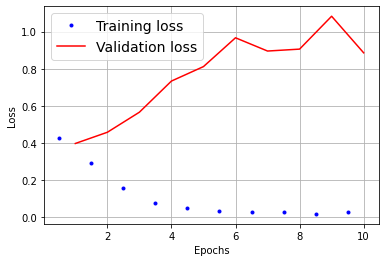

In [ ]:
plot_history(history_df, metric='loss')

Inight: the validation loss increases steadily after the first epoch, as the training loss decreases and the model starts overfitting. Therefore the best model is the one trained with only 1 epoch, so we will keep that one. We will reevaluate it with Aggression data, to see if the training with the Kaggle dataset has changed how the model predicts aggressive comments. 

##### Evaluating with Aggression train data

In [ ]:
input_ids_aggression, attention_masks_aggression, labels_aggression = load_vectors('aggression')

In [ ]:
train_inp_aggression, val_inp_aggression, test_inp_aggression, train_mask_aggression, val_mask_aggression, test_mask_aggression, train_label_aggression, val_label_aggression, test_label_aggression = train_test_val(
    input_ids_aggression, attention_masks_aggression, labels_aggression)

In [ ]:
preds_train_aggression, pred_labels_train_aggression, f1_train_aggression, class_report_train_aggression, conf_matrix_train_aggression = evaluate_model(
    'kaggle_model_1epoch', train_inp_aggression, train_mask_aggression, train_label_aggression, base_model=base_model)

In [ ]:
print_eval(f1_train_aggression, class_report_train_aggression, conf_matrix_train_aggression)

F1 score: 0.7045273540403112
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     64691
           1       0.84      0.61      0.70      9461

    accuracy                           0.93     74152
   macro avg       0.89      0.80      0.83     74152
weighted avg       0.93      0.93      0.93     74152

Confusion Matrix:
[[63579  1112]
 [ 3711  5750]]


##### Evaluating with Aggression test data

In [ ]:
preds_test_aggression, pred_labels_test_aggression, f1_test_aggression, class_report_test_aggression, conf_matrix_test_aggression = evaluate_model(
    'kaggle_model_1epoch', test_inp_aggression, test_mask_aggression, test_label_aggression, base_model=base_model)

In [ ]:
print_eval(f1_test_aggression, class_report_test_aggression, conf_matrix_test_aggression)

F1 score: 0.6633584755855498
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     20217
           1       0.80      0.57      0.66      2956

    accuracy                           0.93     23173
   macro avg       0.87      0.77      0.81     23173
weighted avg       0.92      0.93      0.92     23173

Confusion Matrix:
[[19806   411]
 [ 1285  1671]]


Insight: the recall for class 1 has decreased a lot in both evaluations. 

We will discard this model for now. The next step is to train the aggression model (1 epoch) with the Racism dataset to see if we have the same issue. 

### Racism dataset - 1 epoch

#### Loading the data from the pickle files

In [ ]:
input_ids, attention_masks, labels = load_vectors('racism')

#### Splitting into train, test and validation set

In [ ]:
train_inp, val_inp, test_inp, train_mask, val_mask, test_mask, train_label, val_label, test_label = train_test_val(
    input_ids, attention_masks, labels)

#### Training the model

In [ ]:
racism_model_1epoch, racism_1epoch_history = train_model(
    base_model=base_model, 
    old_model_name='aggression_model_1epoch', 
    new_model_name='racism_model_1epoch', 
    epochs=1)


New model will be saved at /content/gdrive/MyDrive/Cyber-bullying-project/models/racism_model_1epoch.h5

Training on previous model aggression_model_1epoch

Training starting...


270/270 [==============================] - 362s 1s/step - loss: 0.1990 - accuracy: 0.9144 - val_loss: 0.1773 - val_accuracy: 0.9184

Finished training. Saving history at /content/gdrive/MyDrive/Cyber-bullying-project/models/histories/racism_model_1epoch_hist.pkl ...


#### Evaluating the model

##### With Racism train data

In [ ]:
preds_train_racism, pred_labels_train_racism, f1_train_racism, class_report_train_racism, conf_matrix_train_racism = evaluate_model(
    racism_model_1epoch, train_inp, train_mask, train_label)

In [ ]:
print_eval(f1_train_racism, class_report_train_racism, conf_matrix_train_racism)

F1 score: 0.7047434656340754
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7359
           1       0.90      0.58      0.70      1261

    accuracy                           0.93      8620
   macro avg       0.92      0.78      0.83      8620
weighted avg       0.93      0.93      0.92      8620

Confusion Matrix:
[[7282   77]
 [ 533  728]]


##### With Racism test data

In [ ]:
preds_test_racism, pred_labels_test_racism, f1_test_racism, class_report_test_racism, conf_matrix_test_racism = evaluate_model(
    racism_model_1epoch, test_inp, test_mask, test_label)

In [ ]:
print_eval(f1_test_racism, class_report_test_racism, conf_matrix_test_racism)

F1 score: 0.6518282988871223
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2301
           1       0.87      0.52      0.65       394

    accuracy                           0.92      2695
   macro avg       0.90      0.75      0.80      2695
weighted avg       0.92      0.92      0.91      2695

Confusion Matrix:
[[2271   30]
 [ 189  205]]


##### Evaluating with Aggression train data

In [ ]:
preds_train_aggression, pred_labels_train_aggression, f1_train_aggression, class_report_train_aggression, conf_matrix_train_aggression = evaluate_model(
    'racism_model_1epoch', train_inp_aggression, train_mask_aggression, train_label_aggression, base_model=base_model)

In [ ]:
print_eval(f1_train_aggression, class_report_train_aggression, conf_matrix_train_aggression)

F1 score: 0.03481624758220503
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     64691
           1       0.47      0.02      0.03      9461

    accuracy                           0.87     74152
   macro avg       0.67      0.51      0.48     74152
weighted avg       0.82      0.87      0.82     74152

Confusion Matrix:
[[64500   191]
 [ 9290   171]]


##### Evaluating with Aggression test data

In [ ]:
preds_test_aggression, pred_labels_test_aggression, f1_test_aggression, class_report_test_aggression, conf_matrix_test_aggression = evaluate_model(
    'racism_model_1epoch', test_inp_aggression, test_mask_aggression, test_label_aggression, base_model=base_model)

In [ ]:
print_eval(f1_test_aggression, class_report_test_aggression, conf_matrix_test_aggression)

F1 score: 0.030045721750489876
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     20217
           1       0.43      0.02      0.03      2956

    accuracy                           0.87     23173
   macro avg       0.65      0.51      0.48     23173
weighted avg       0.82      0.87      0.82     23173

Confusion Matrix:
[[20157    60]
 [ 2910    46]]


Insight: in this case the evaluation with the aggression dataset yields very poor results with a recall of 0.02 for class 1. 

## Conclusion

To distinguish between different types of bullying behaviors (racism, sexism, aggression, etc) we would need to build a multiclass classifier, not a binary classifier. Due to time constraints, for this project we will keep the best model trained on a single dataset, the aggression_model_1epoch. 